------
------
# SISTEMAS DE CONTROL II - FCEFyN - 2025
## Alumno: Ferraris Domingo
----
----

## Diseños De Controladores Discretos
-----

### Resultados

#### Item 1: Estudio Del Sistema, Respuesta Deseada Y Punto De Trabajo
Utilizando las **caracteristicas/requerimientos asignados para el ejercicio** se calcularon los parametros asi como el **punto de funcionamiento** de la respuesta deseada:  
> zp    = 0.8751 + 0.1446i (r = 0.8869, f = 9.3808°)  
> * psita = 0.5912  
> * wn    = 2.2555  
> * wd    = 1.8192  

Ademas se verificaron **38 muestras por ciclo**, mas que suficiente para trabajar con el sistema:
> m = 38.3764

-----

#### Item 2: Diseños mediante sisotool
Utilizando sisotool se diseñaron controladores **PD y en ADELANTO** mediante lugar de raices  
En todos los diseños **se logro cumplir con los requerimientos** propuestos:

> Control PD
> * Mp ~ 10%  
> * tss ~ 2.4s  
> * ess = 0  

> Control ADELANTO1
> * Mp ~ 10%  
> * tss ~ 2.6s  
> * ess = 0

> Control ADELANTO2
> * Mp ~ 10%  
> * tss ~ 2.5s  
> * ess = 0

-----

#### Item 3: Simulacion en Simulink
Se eligio como mejor dinamica a la obtenida por el controlador ADELANTO1 y **se simulo el sistema en simulink**

----


### Detalles

#### Item 1: Estudio Del Sistema, Respuesta Deseada Y Punto De Trabajo
Para empezar se fijaron las caracteristicas dadas para nuestra planta y las especificaciones de la respuesta deseada  
Luego mediante Matlab se calcularon los **parametros y el punto de funcionamiento necesario** en el plano Z:

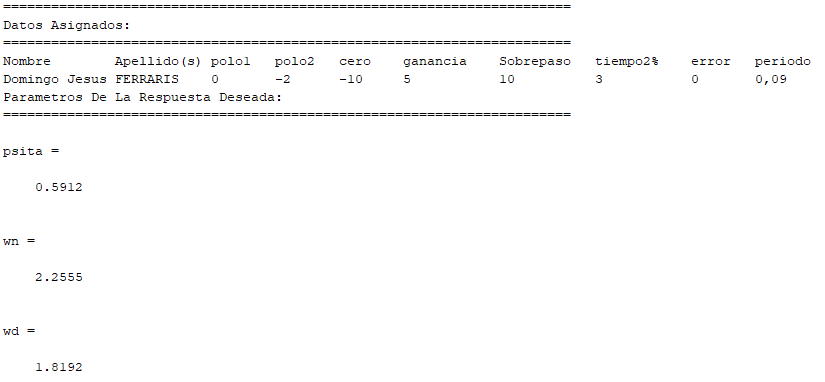

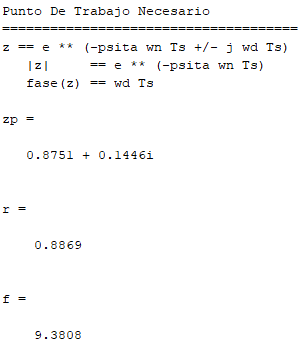

Finalmente se comprobaron las **muestras por ciclo** para el periodo de muestreo dado:  

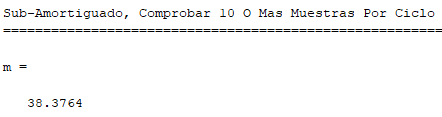

Dando unas 38 muestras por ciclo, bastante mayor a las 10 necesarias  
Dado el caso de que se presenten problemas en la implementacion, **tenemos margen para disminur la frecuencia de mustreo** si fuera necesario  

Ademas estudiando los polos y ceros de la planta vemos que tiene sus polos/ceros dentro del semi-circulo derecho y es un **sistema de TIPO-I** por lo que esperamos un error de regulacion nulo:

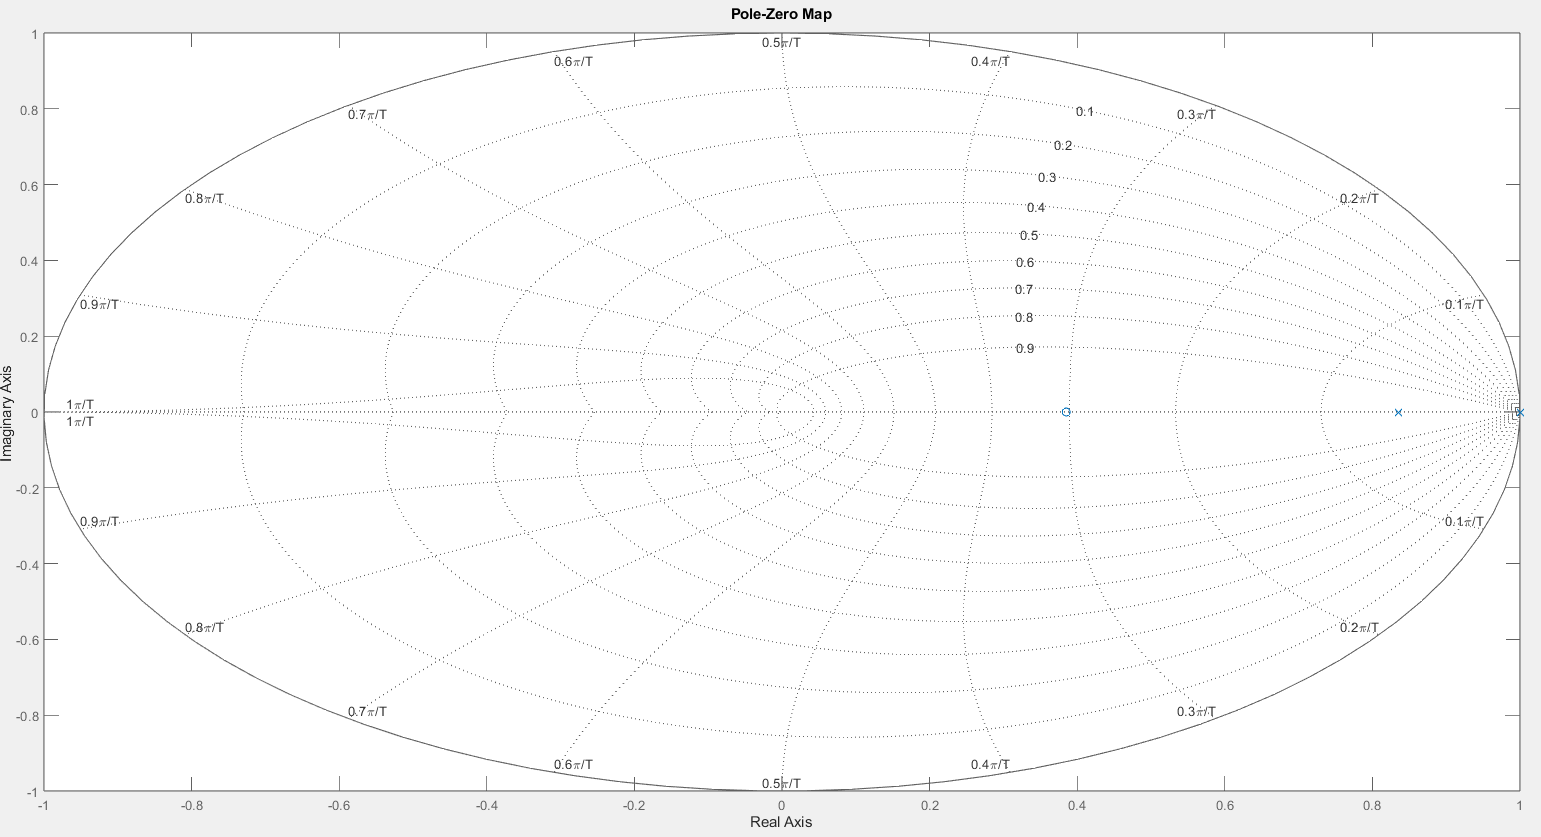

----


#### Item 2: Diseños Con Sisotool
Iniciamos el sisotool con nuestra planta discretizada, y **agregamos los requerimientos de diseño** para nuestra respuesta y se visualiza el punto de trabajo necesario:

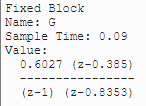

> tss < 3s  
> Mp < 10%

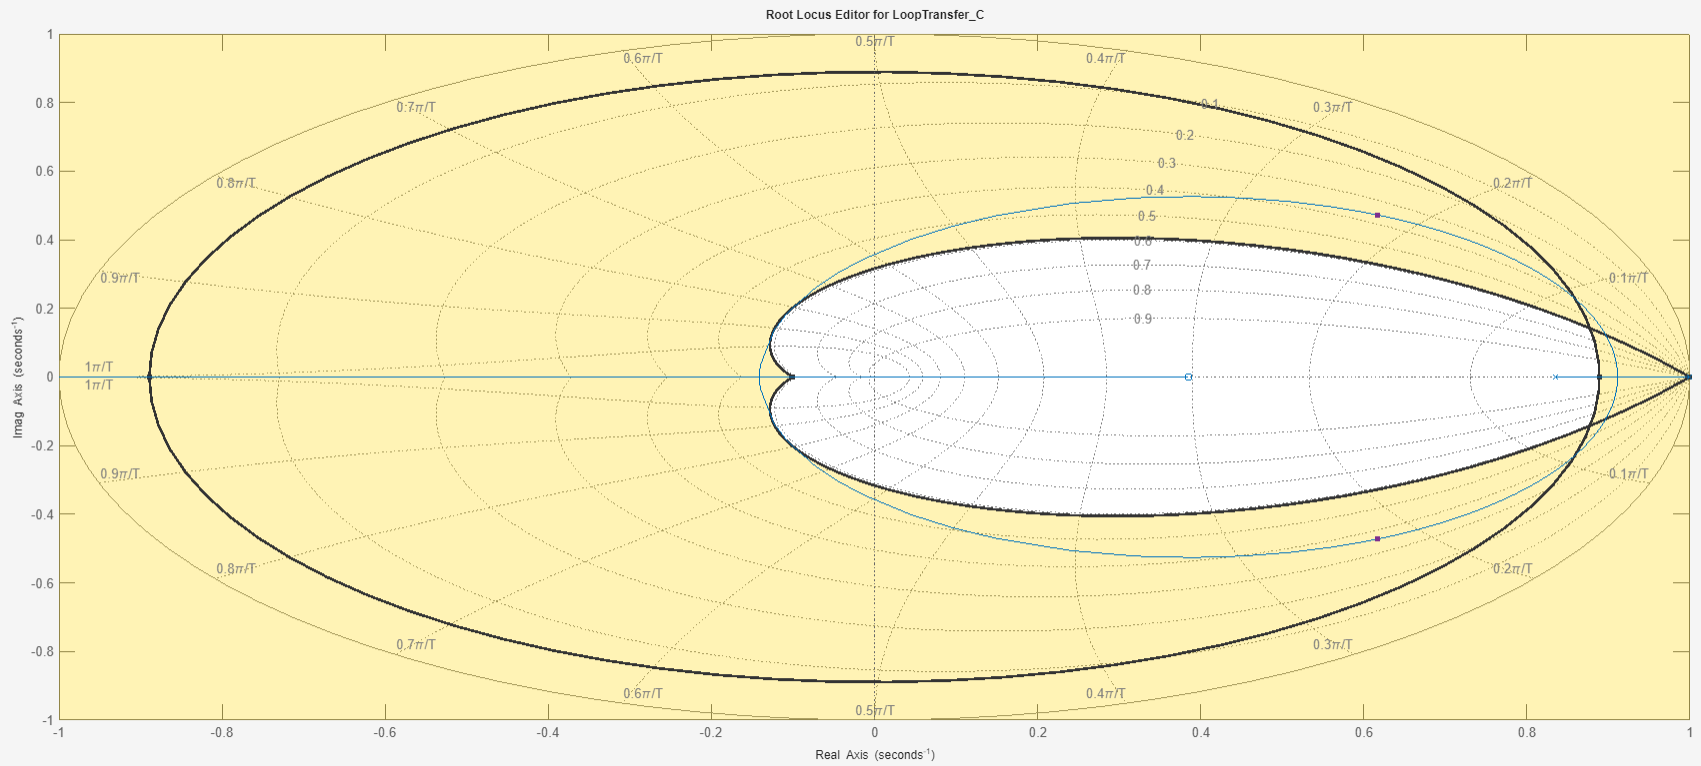

Como el sistema ya tiene accion integradora **cumple con la especificacion de error de regulacion nulo**  
Verificamos que no alcanza con un control proporcional y debemos agregar un controlador de manera que **curve el lugar de raices en adelanto**  

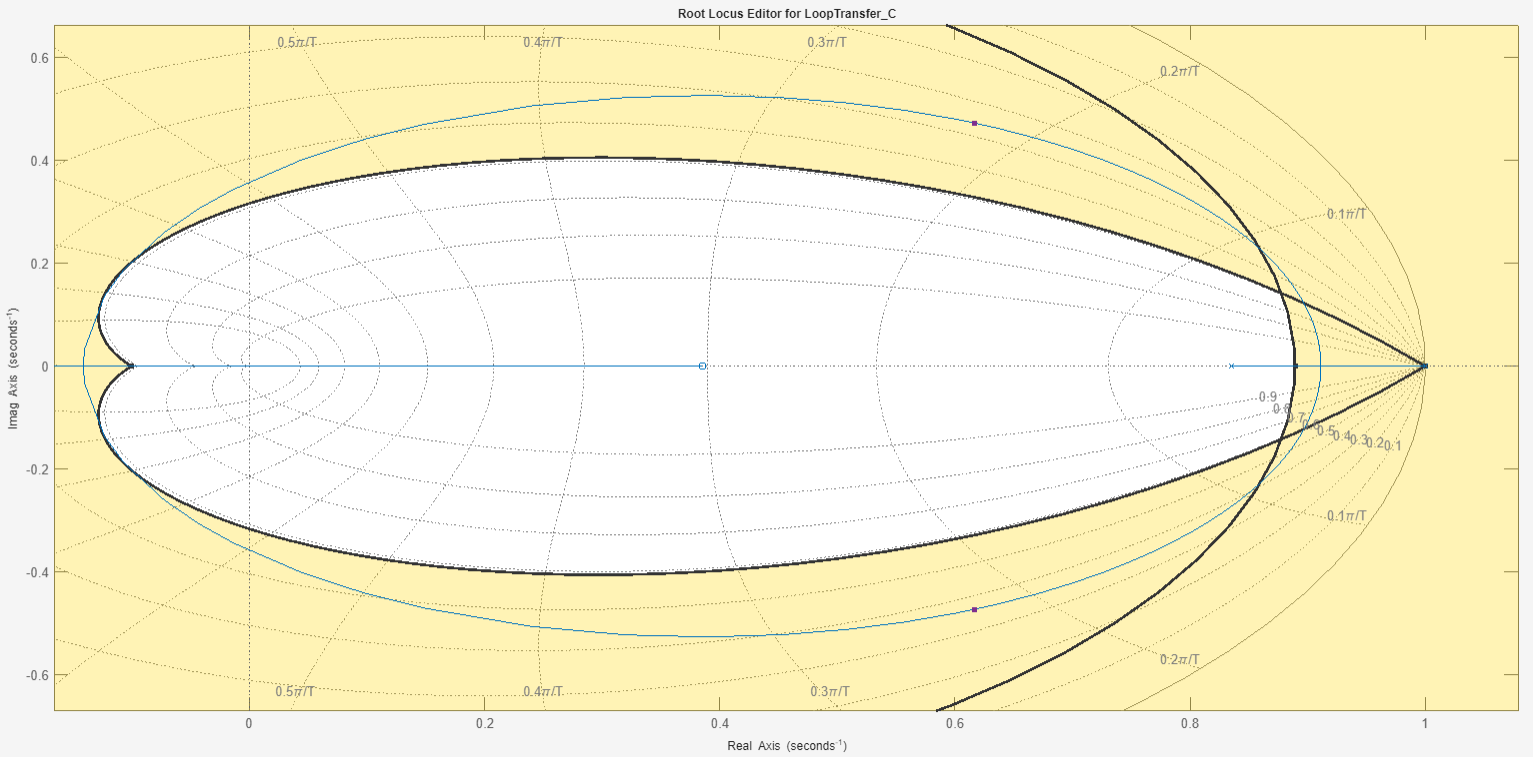

##### Control PD:
Como primer opcion agregamos un controlador PD, este agrega un polo en el origen y un cero/ganancia variable  
Agregamos el polo/cero y vemos la configuracion inicial que iremos **ajustando para obtener la respuesta deseada:**

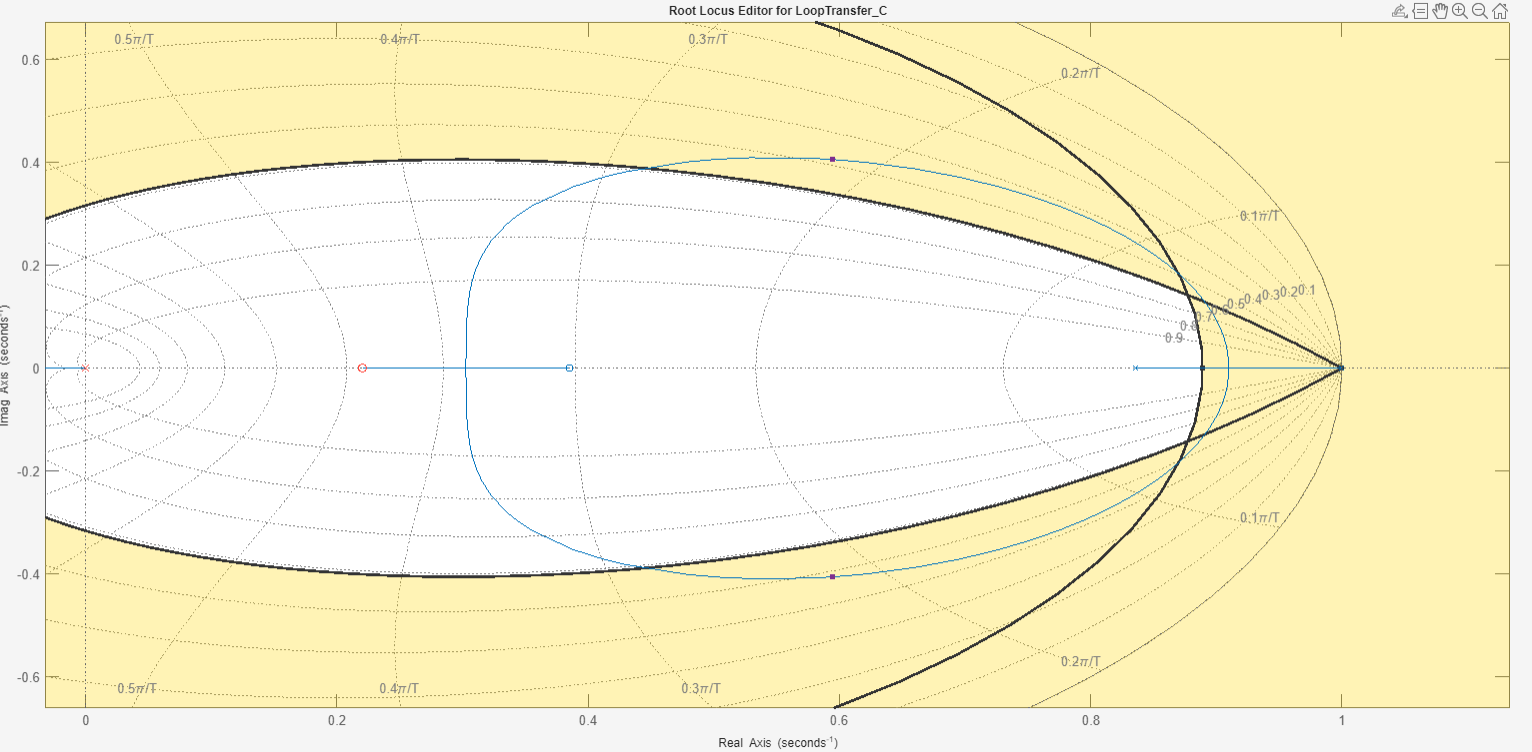

Partiendo de aqui fijamos correctamente el polo del origen, corremos hacia la derecha el cero y bajamos la ganancia hasta obtener la configuracion deseada  
Ademas comprobamos que la respuesta temporal cumpla con nuestros requerimientos:

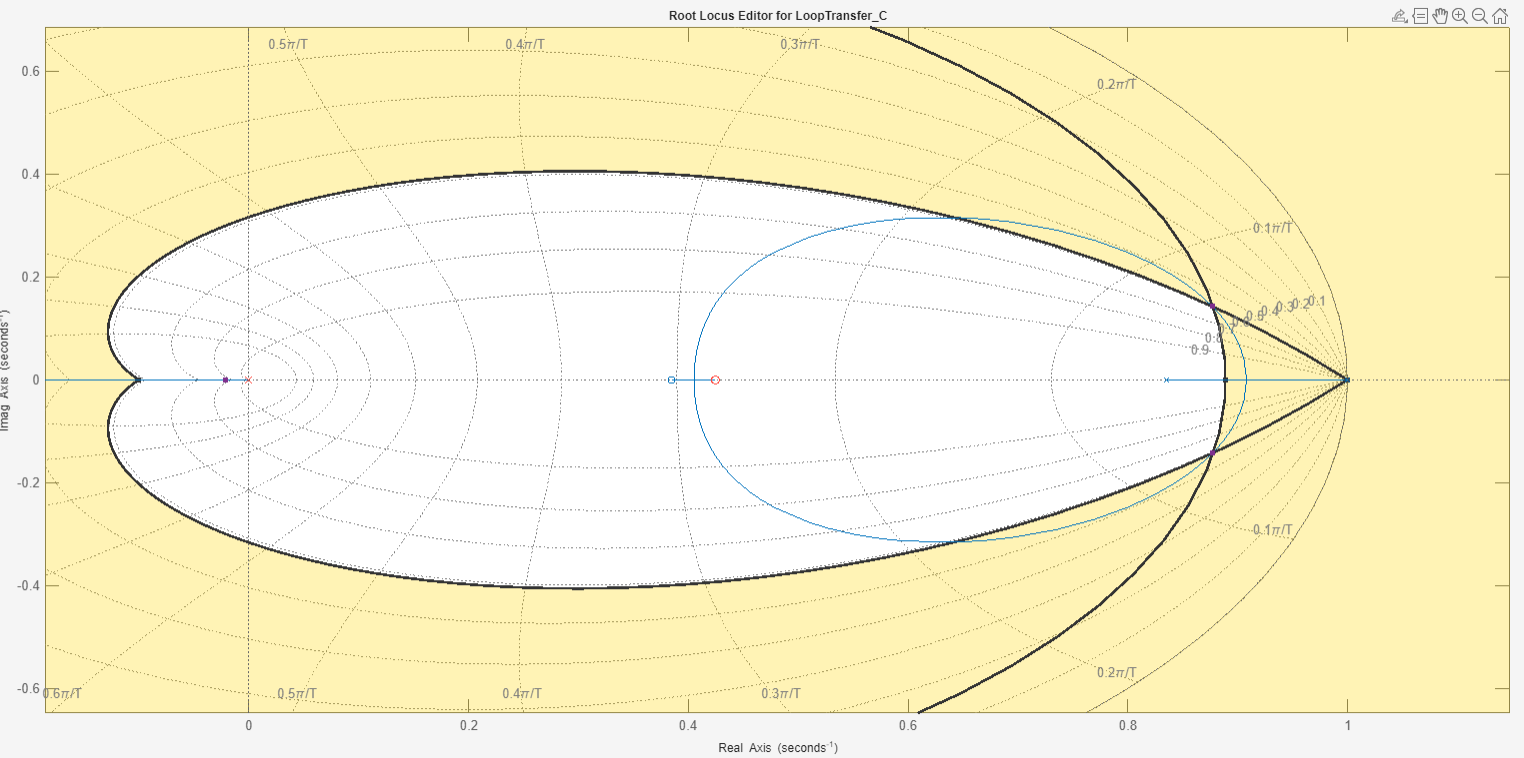

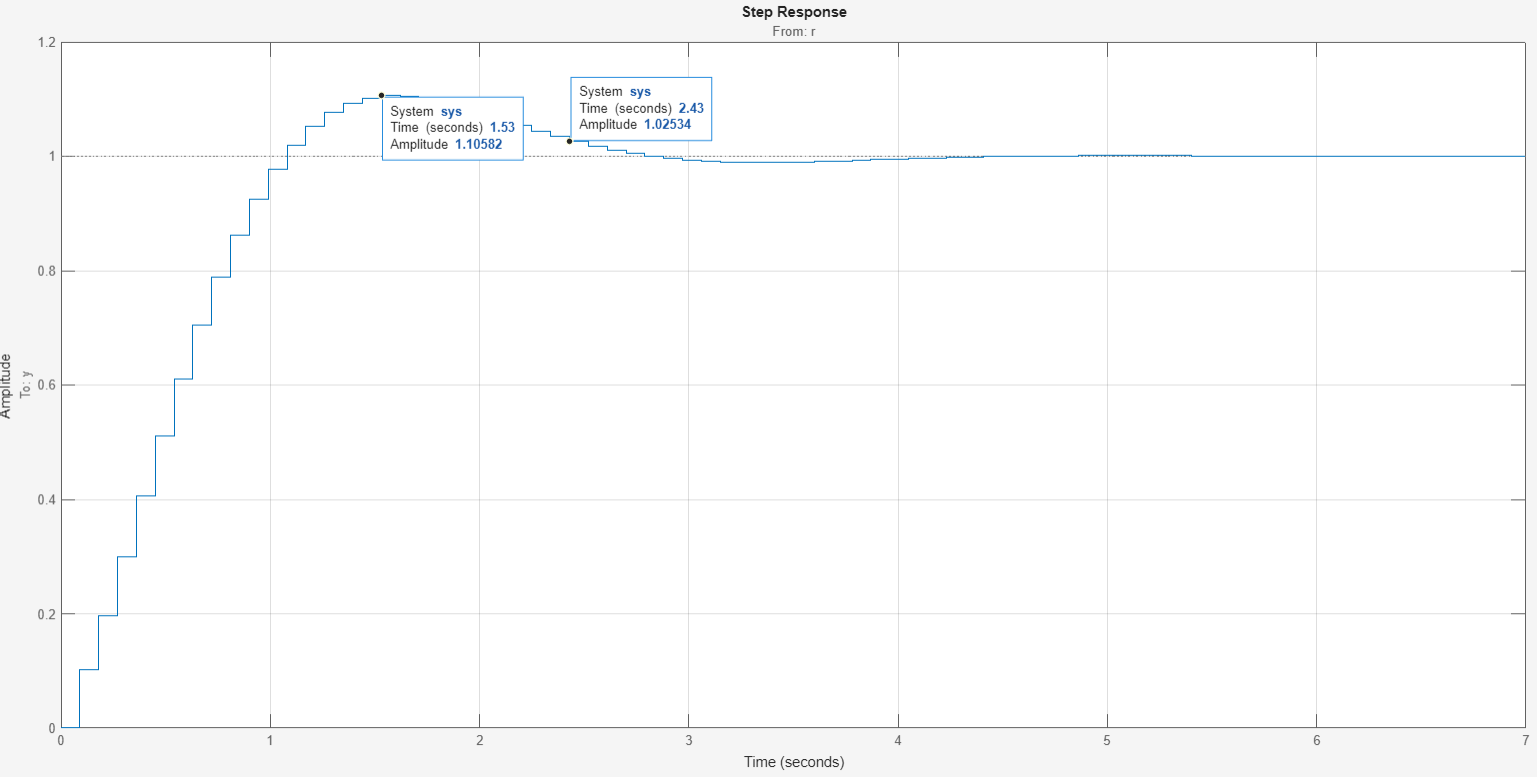

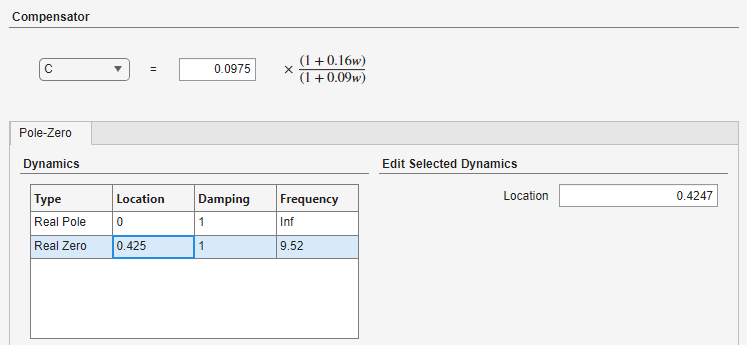

Con este controlador PD se obtiene un tss ~ 2.4s y Mp ~ 10% por lo que cumple con los requerimientos. Sin embargo vemos como **el polo del origen se cruza hacia el semicirculo-izquierdo** algo no deseado generalmente, aunque para este caso al estar tan cerca del origen **su influencia en la respuesta temporal es despreciable**

##### Control en ADELANTO1:
Para evitar el polo en el semi-circulo izquierdo probamos con un controlador en adelanto, que agrega polo/cero/ganancia variables siendo el cero mayor al polo  
Optamos por un **diseño de cancelacion del polo dominante** del sistema, variamos el polo hacia la izquierda y disminuimos la ganancia hasta obtener:

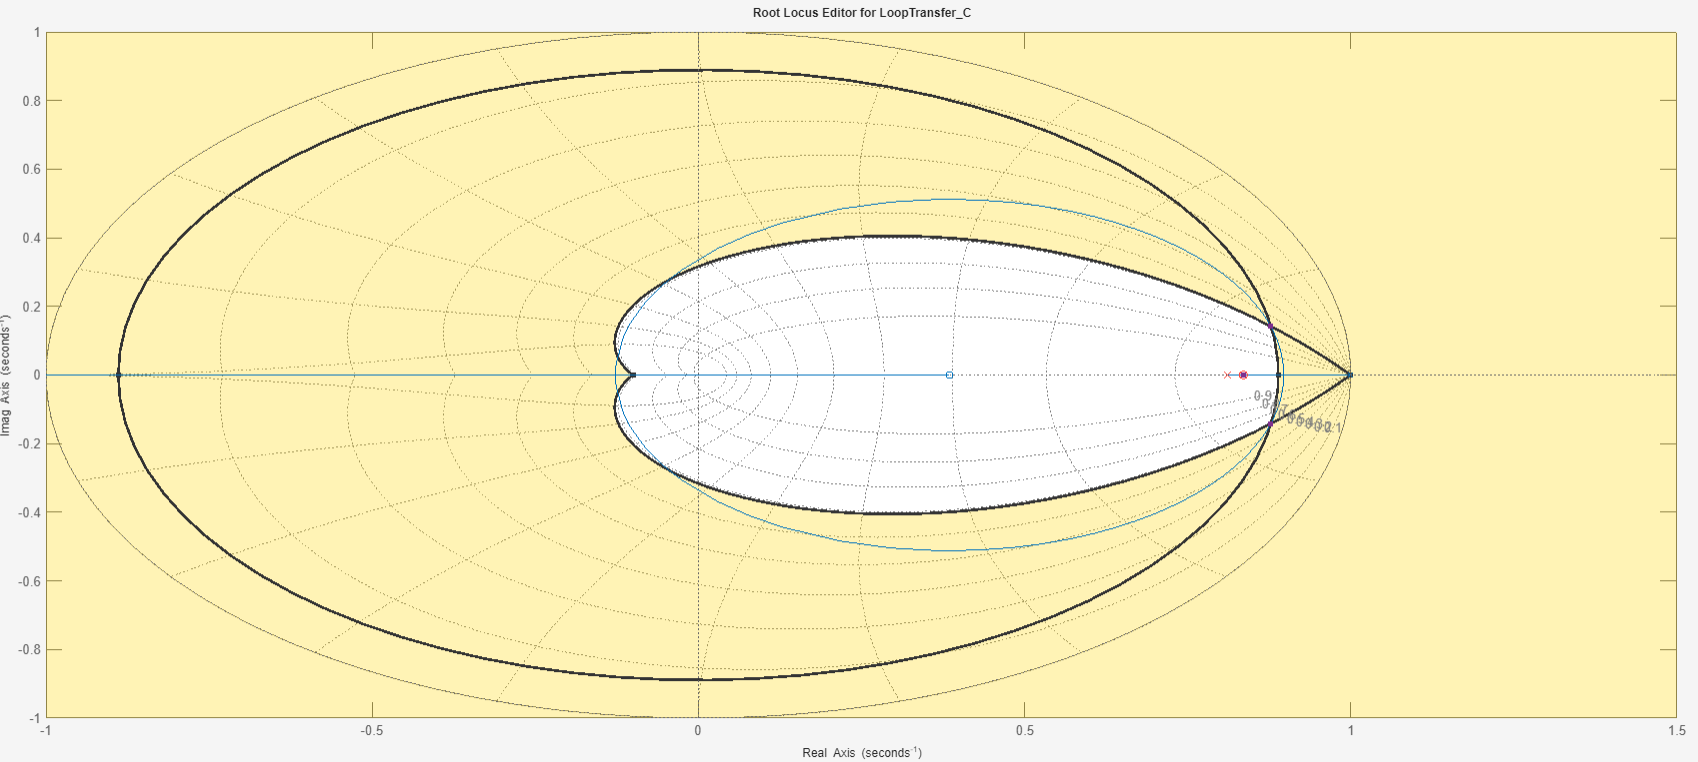

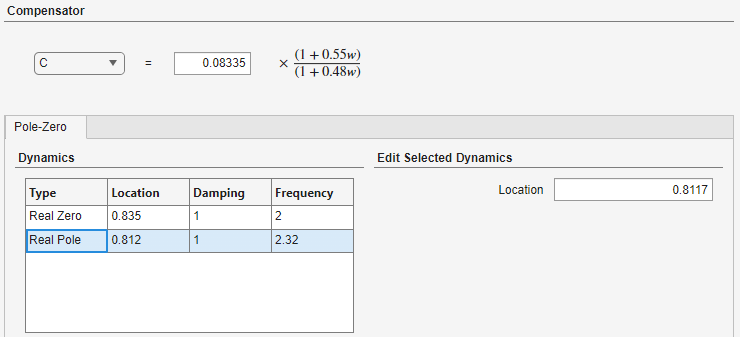

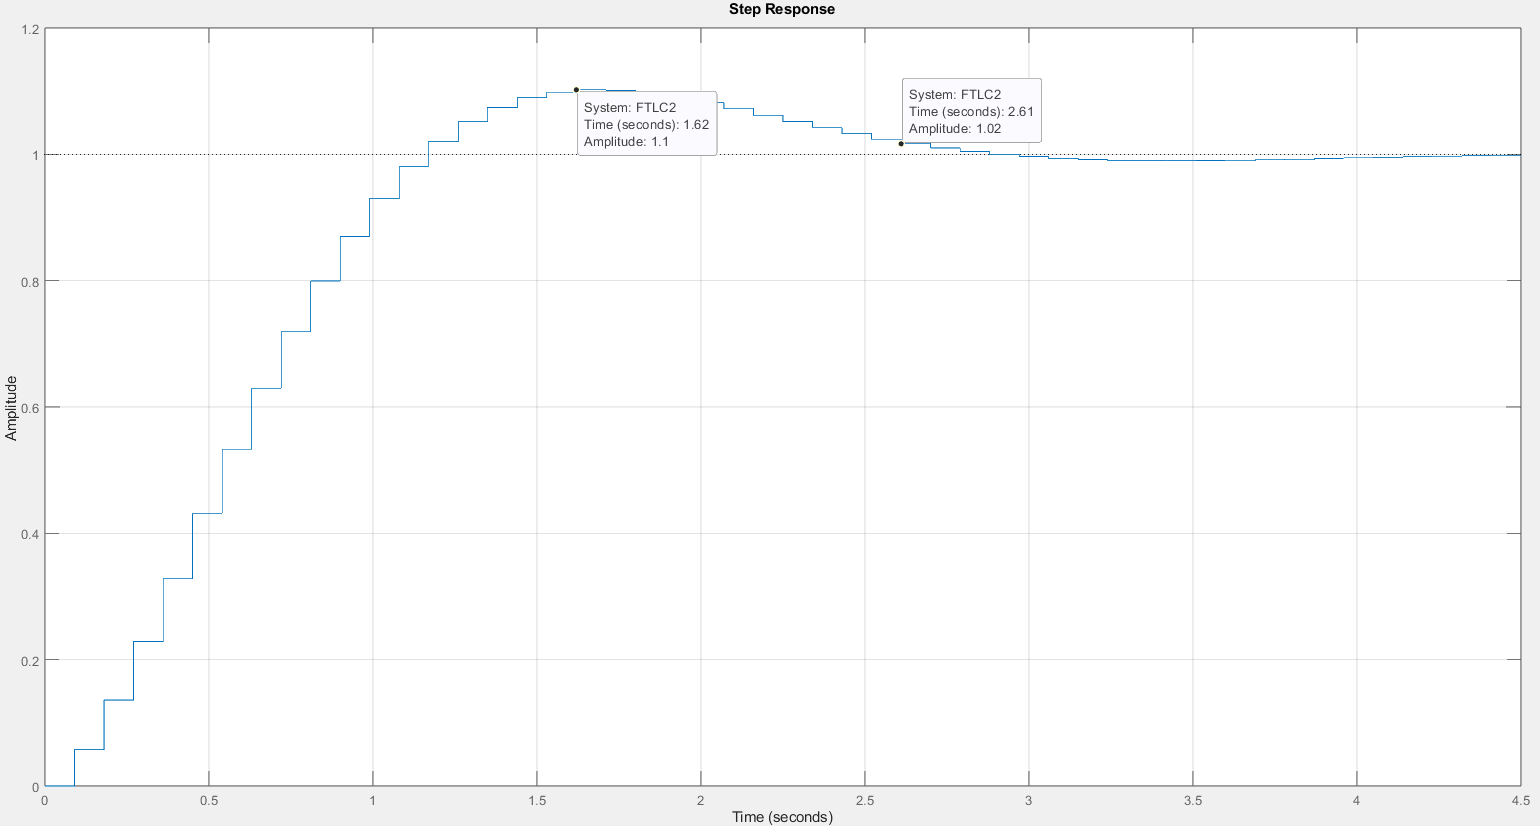

Con este controlador en ADELANTO se obtiene un tss ~ 2.6s (algo mas lento que con PD) y Mp ~ 10% por lo que cumple con los requerimientos. En este caso no tenemos el problema del polo en el semi-circulo izquierdo, pero por la cercania entre los polo/cero agregados toma importancia la precision de donde esten ubicados tanto para la correcta cancelacion como para mantener la distancia entre ambos

##### Control en ADELANTO2:
Dada la libertad que ofrece sisotool probamos con un controlador en adelanto, esta vez **cancelando el cero de la planta** y variando cero/ganancia del controlador  
Cancelamos el cero del sistema, variamos el cero hacia la derecha y disminuimos la ganancia hasta obtener:

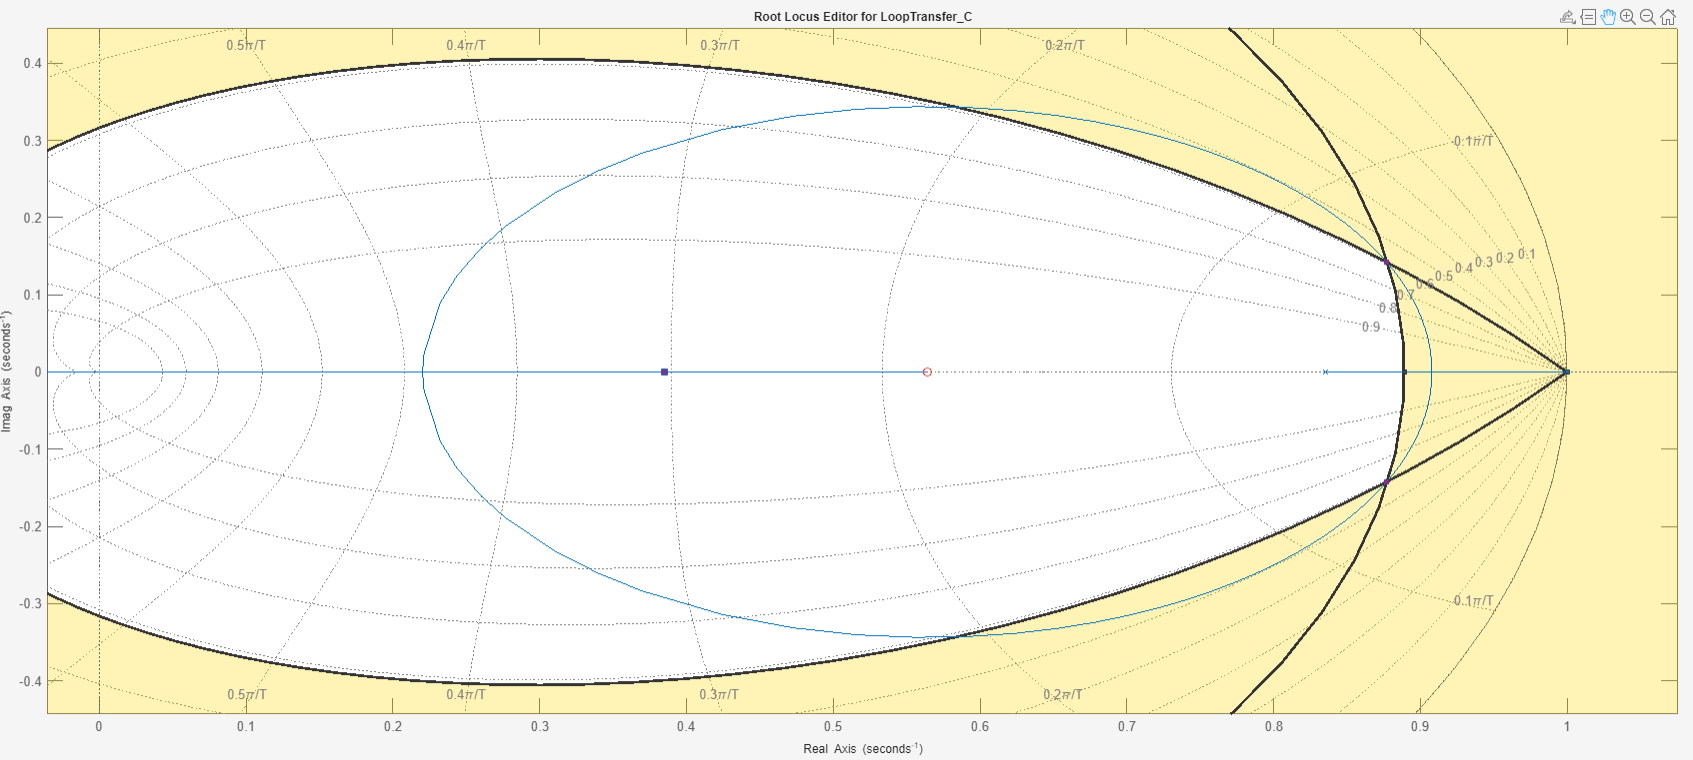

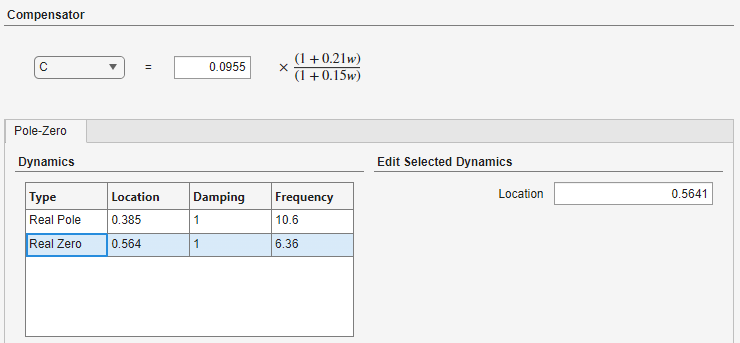

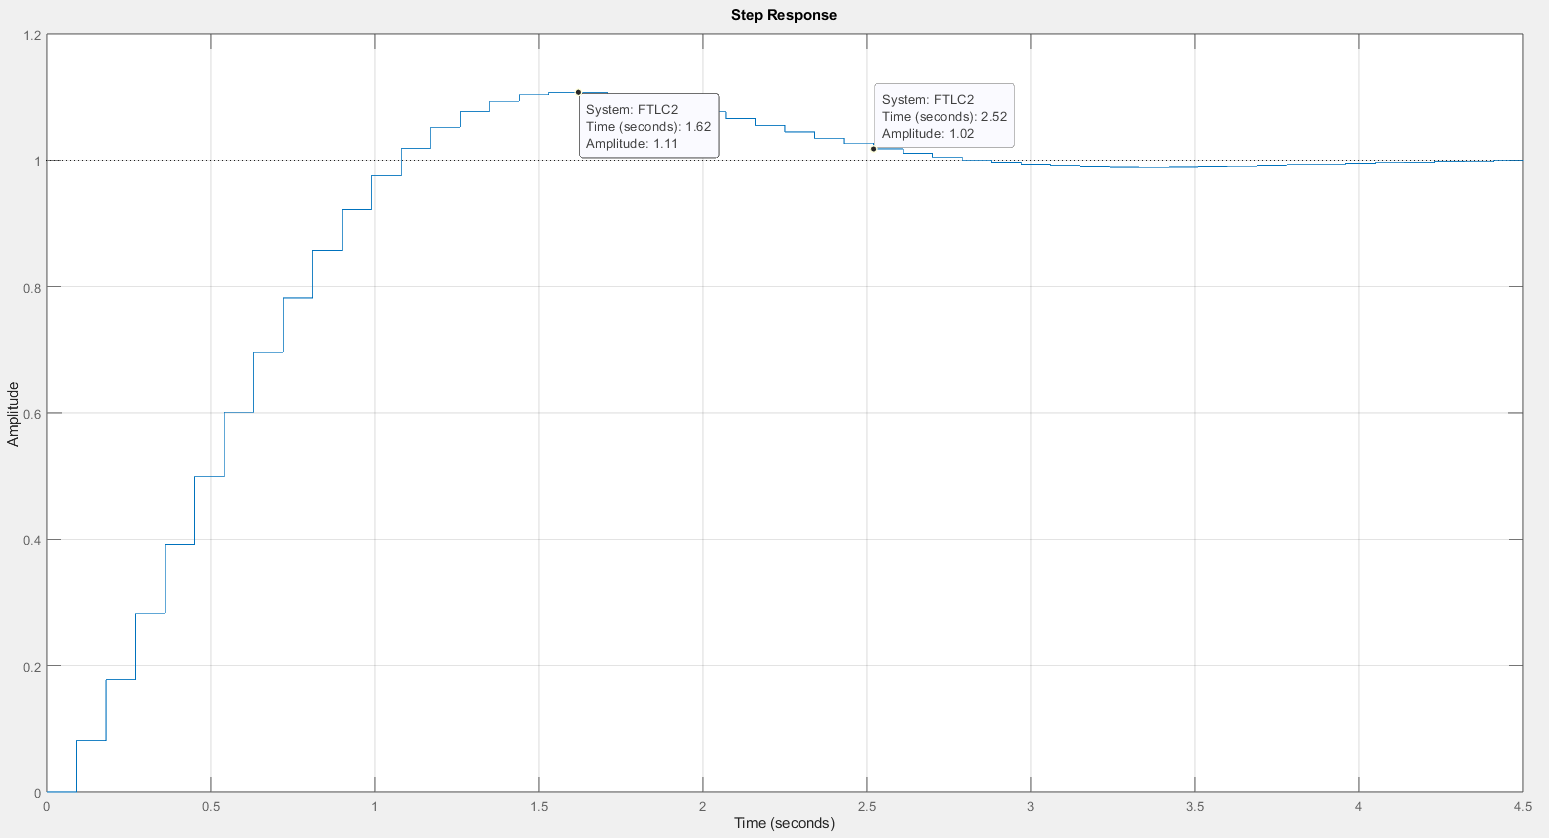

Logrando cumplir con las especificaciones dadas, pero con una dinamica un tanto mas rapida que la del diseño anterior

----


## Item 3: Simulacion en Simulink
Dado que cumple las especificaciones (a pesar de ser un poco mas lento) y para evitar el efecto de derivative-kick **se elige al diseño en ADELANTO por cancelacion del polo dominante como el mas adecuado** para este caso
Se armo el sistema correspondiente en simulink y agregaron scopes para visualizar la salida, error y la accion de control:

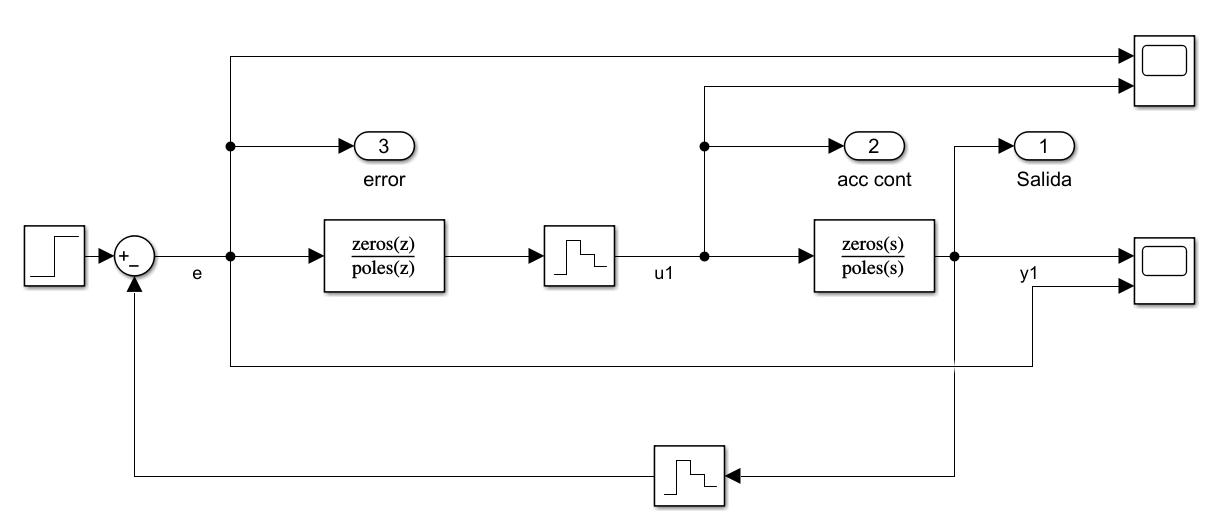

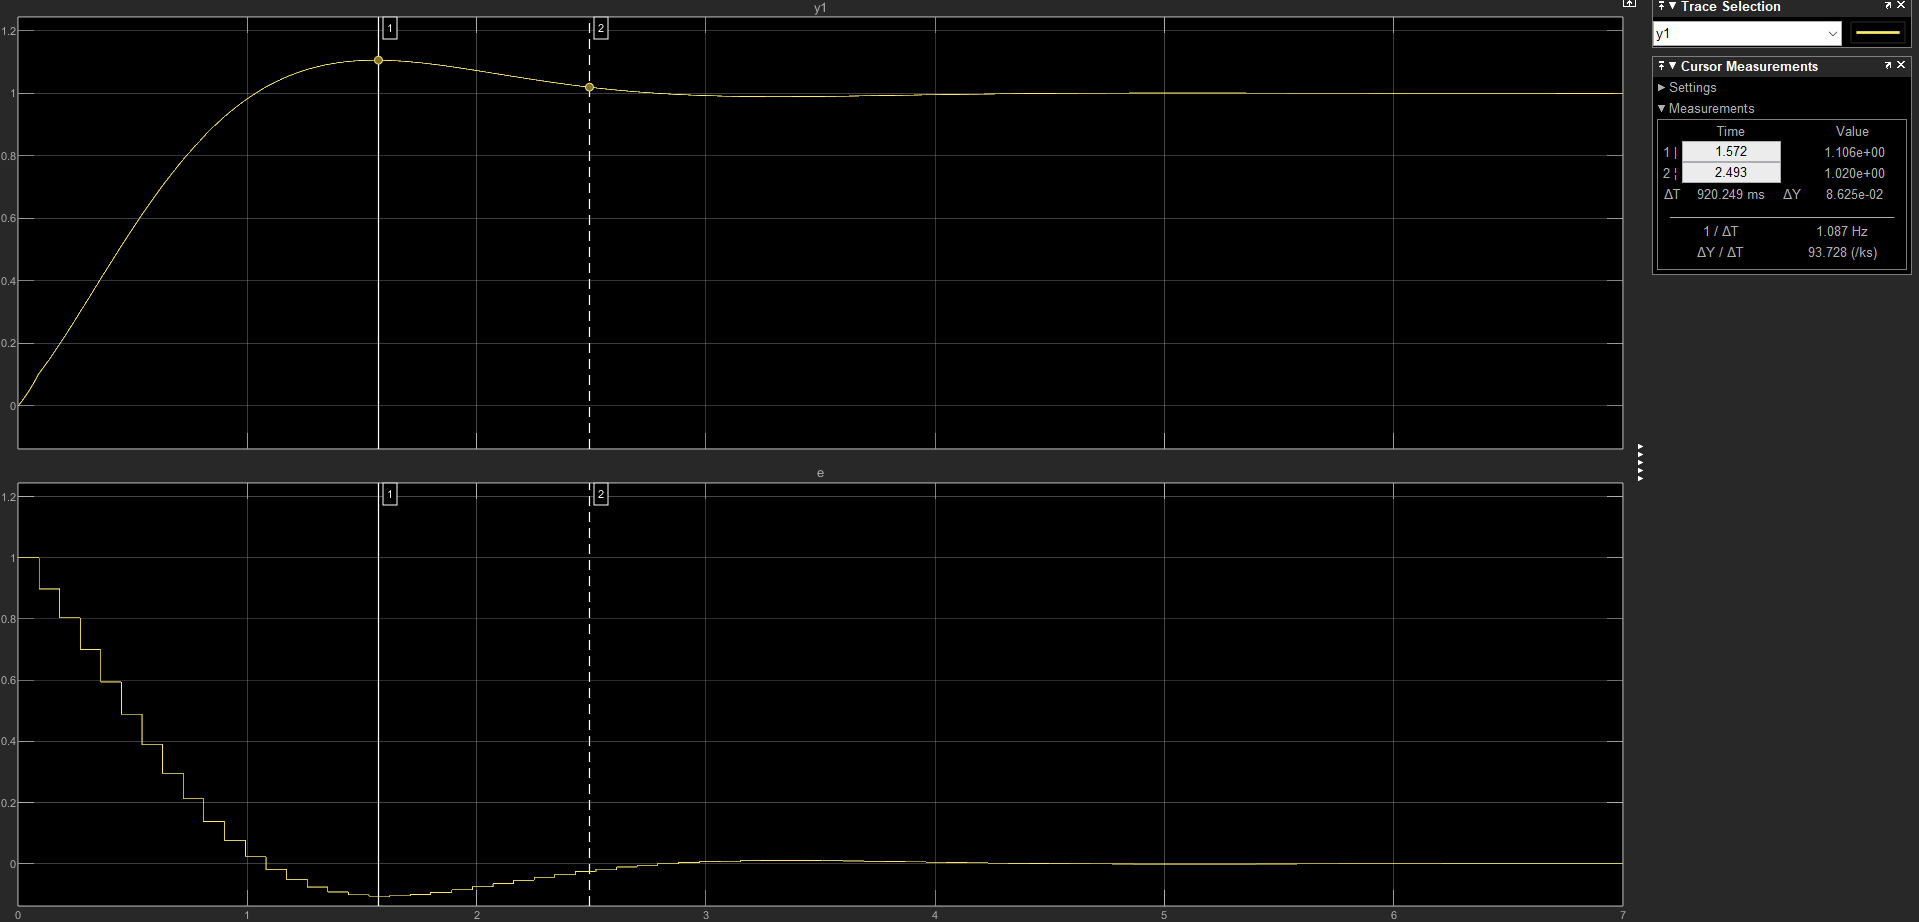

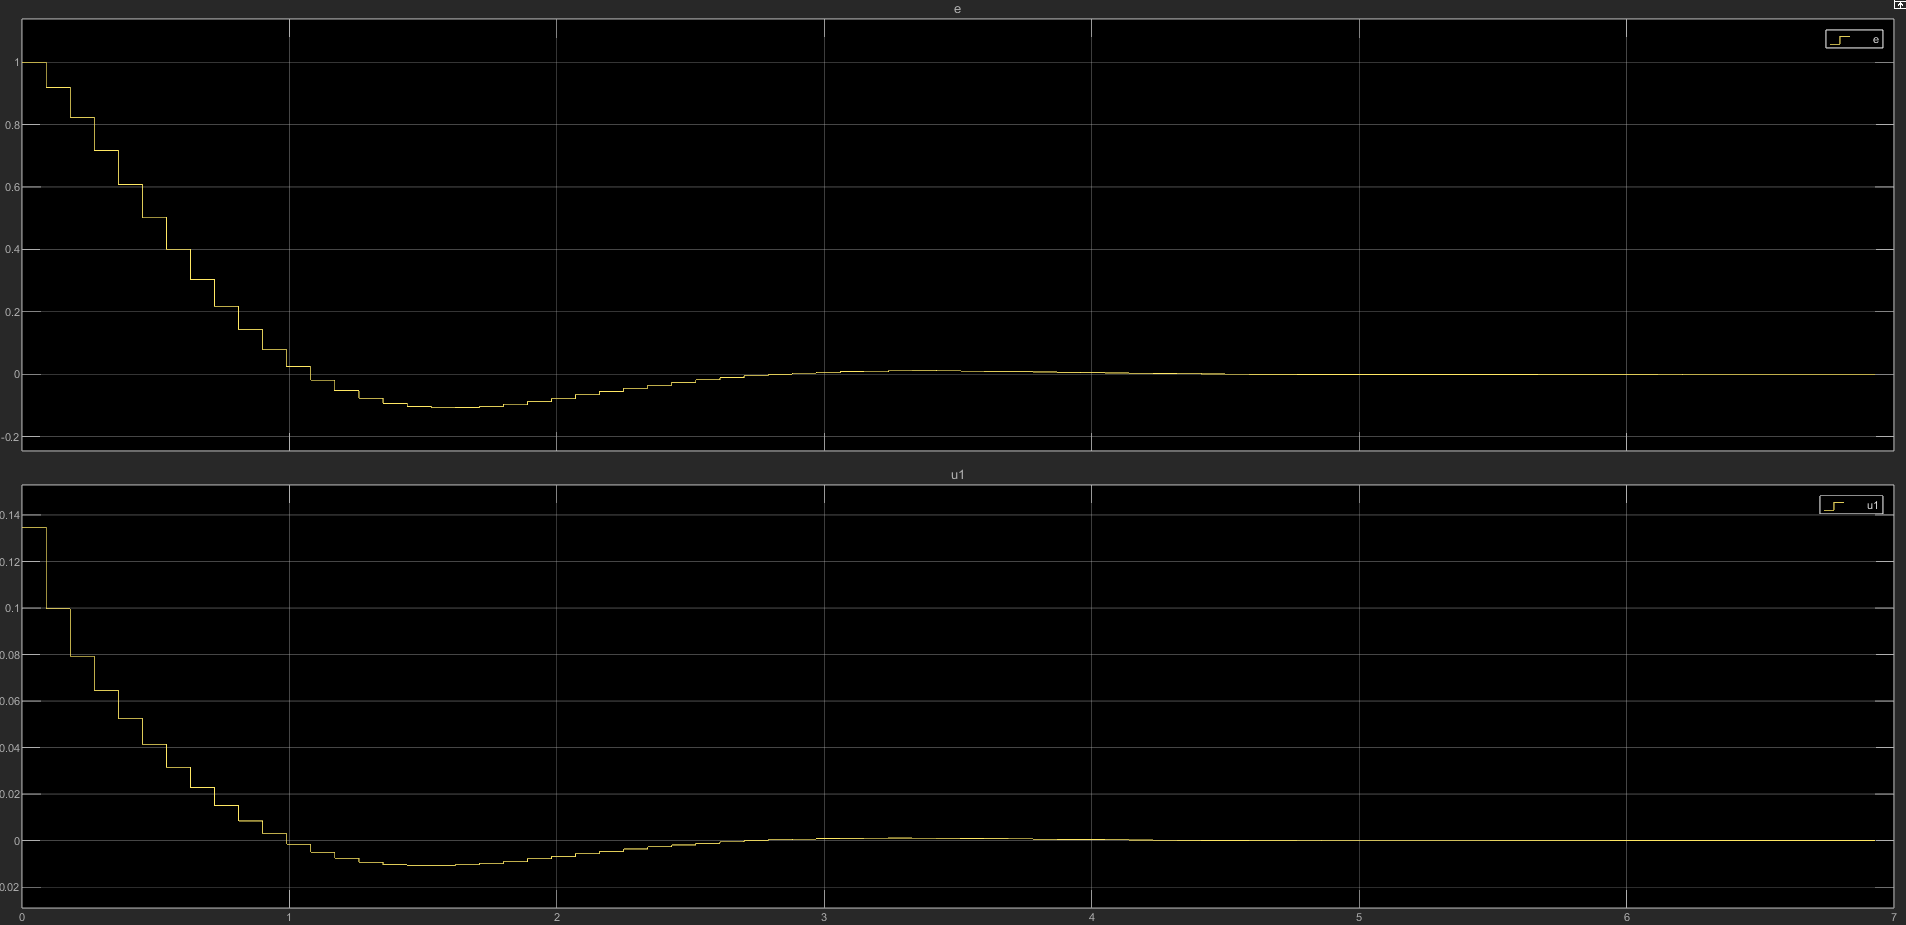

----


----------

## Fuentes/herramientas
1. Apuntes/Videos De La Materia
2. Matlab, Simulink, Chat-GPT, vscode

## GitHub
1. https://github.com/Clifferto/carrerpath/tree/control2/nationalUniversity/2025/controlSystems2  

----------